### Author : Hariharan J
### Date : 1 November 2022

# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company wants to know:
i)  Which variables are significant in predicting the price of a house. 
ii) How well those variables describe the price of a house.

# Business Goal:

Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Determine the optimal value of lambda for ridge and lasso regression.

This model will then be used by the management to understand how exactly the prices vary with the variables

They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

The model will be a good way for the management to understand the pricing dynamics of a new market.

# We follow these steps by below:

1) Data understanding 
2) Data cleaning
3) EDA
4) Data preparation.
5) Model building and evaluation.
6) Observation and inference.

# 1) Data understanding


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data set from train csv file 
housingDF = pd.read_csv("train.csv", encoding = 'utf-8')
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# View the dimensions using shape method
housingDF.shape


(1460, 81)

In [4]:
# view the column details using info method
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housingDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Data Cleaning 

In [6]:
#checking duplicates using Id column 
sum(housingDF.duplicated(subset = 'Id')) == 0

True

In [7]:
# Checking for percentage nulls
round(100*(housingDF.isnull().sum()/len(housingDF.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

## Imputing Missing Values


### a) Removing/Imputing NaN values in Categorical attributes

In [8]:
# checking null values in all categorical columns
housingDF.select_dtypes(include='object').isnull().sum()[housingDF.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
   housingDF[col]=housingDF[col].fillna('None')

Remove the categorical attributes that have more than 85% data associated to one value.

- Remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [10]:
# Drop the following columns that have more than 85% values associated to a specific value
# Below Method get the column names that have count of one value more than 85%
def fetchHighCategoricalValueCounts():
    columnArray = []
    categorical_columns = housingDF.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingDF[col].value_counts().max() >= 1241):
            columnArray.append(col)
    return columnArray

columnsToBeRemoved = fetchHighCategoricalValueCounts()
# Remove columns with skewed data
housingDF.drop(columnsToBeRemoved, axis = 1, inplace = True)
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [11]:
# check once again for null values in all categorical columns
housingDF.select_dtypes(include='object').isnull().sum()[housingDF.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables

### b) Removing null values in Numerical attributes

In [12]:
# check the null values in the numerical data like int64 & float
housingDF.select_dtypes(include=['int64','float']).isnull().sum()[housingDF.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns
housingDF['LotFrontage'] = housingDF['LotFrontage'].replace(np.nan, housingDF['LotFrontage'].median())
housingDF['MasVnrArea'] = housingDF['MasVnrArea'].replace(np.nan, housingDF['MasVnrArea'].median())

In [14]:
# Setting the null values with 0 for GarageYrBlt as of now. we would be handling this column further below
housingDF['GarageYrBlt'] = housingDF['GarageYrBlt'].fillna(0)
housingDF['GarageYrBlt'] = housingDF['GarageYrBlt'].astype(int)

###  Derived Columns - Feature Engineering

In [15]:
#  New column will be created and named as IsRemodelledOrNot - This column would determine whether the house has been remodelled or not based on the difference between remodelled and built years
def checkRemodelOrNot(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingDF['IsRemodelledOrNot'] = housingDF.apply(checkRemodelOrNot, axis=1)
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelledOrNot
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [16]:
# New column will be created and named as BuiltOrRemodelledAge & determine the age of the building at the time of selling
def fetchBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housingDF['BuiltOrRemodelAge'] = housingDF.apply(fetchBuiltOrRemodelAge, axis=1)
housingDF.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelledOrNot,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [17]:
# New column will be created.Also which would indicate if the Garage is Old or New.
# Garage Yr Built less than 2000 will be considered as Old (0) else New(1). 
# For GarageYrBuilt, where we have imputed the value as 0 will also be treated as old.

def fetchGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housingDF['NewOrOldGarage'] = housingDF['GarageYrBlt'].apply(fetchGarageConstructionPeriod)
housingDF.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelledOrNot,BuiltOrRemodelAge,NewOrOldGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [18]:
data_Original = housingDF.copy
# BuiltOrRemodelAge

In [19]:
housingDF.drop(['NewOrOldGarage', 'IsRemodelledOrNot'], axis = 1, inplace = True)

In [20]:
# Created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, so we can drop these columns as we would only be using the derived columns for further analysis

housingDF.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

### Remove numerical attributes that have more than 85% data associated to one value.

i) Remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [21]:
# Drop the following columns that have more than 85% values associated to a specific value
# Drop MoSold as we will not be using this for further analysis

def fetchHighNumericalValueCounts():
    columnArray = []
    numerical_columns = housingDF.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingDF[col].value_counts().max() >= 1241):
            columnArray.append(col)
    return columnArray

columnsToBeRemoved = fetchHighNumericalValueCounts()
housingDF.drop(columnsToBeRemoved, axis = 1, inplace = True)
housingDF.drop(['MoSold'], axis = 1, inplace = True)
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,Attchd,RFn,2,548,0,61,None,Normal,208500,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,Attchd,RFn,2,460,298,0,None,Normal,181500,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,Attchd,RFn,2,608,0,42,None,Normal,223500,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Detchd,Unf,3,642,0,35,None,Abnorml,140000,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,Attchd,RFn,3,836,192,84,None,Normal,250000,8


In [22]:
# check -> percentage of null values in each column
percentOfMissing = round(100*(housingDF.isnull().sum()/len(housingDF.index)), 2)
print(percentOfMissing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [23]:
# Check for any duplicate values in the dataset
housingDF[housingDF.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,BuiltOrRemodelAge


#### No duplicates values 

In [24]:
# Group all numeric (float and int) variables in the dataset
house_numeric = housingDF.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,BuiltOrRemodelAge
0,1,60,65.0,8450,7,5,196.0,706,150,856,...,1,3,8,0,2,548,0,61,208500,5
1,2,20,80.0,9600,6,8,0.0,978,284,1262,...,0,3,6,1,2,460,298,0,181500,31
2,3,60,68.0,11250,7,5,162.0,486,434,920,...,1,3,6,1,2,608,0,42,223500,6
3,4,70,60.0,9550,7,5,0.0,216,540,756,...,0,3,7,1,3,642,0,35,140000,36
4,5,60,84.0,14260,8,5,350.0,655,490,1145,...,1,4,9,1,3,836,192,84,250000,8


In [25]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   int64  
 4   OverallQual        1460 non-null   int64  
 5   OverallCond        1460 non-null   int64  
 6   MasVnrArea         1460 non-null   float64
 7   BsmtFinSF1         1460 non-null   int64  
 8   BsmtUnfSF          1460 non-null   int64  
 9   TotalBsmtSF        1460 non-null   int64  
 10  1stFlrSF           1460 non-null   int64  
 11  2ndFlrSF           1460 non-null   int64  
 12  GrLivArea          1460 non-null   int64  
 13  BsmtFullBath       1460 non-null   int64  
 14  FullBath           1460 non-null   int64  
 15  HalfBath           1460 non-null   int64  
 16  BedroomAbvGr       1460 

In [26]:
# Check -> outlier in the numerical columns
house_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,BuiltOrRemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,22.950000
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,20.640653
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,-1.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,14.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,41.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,56.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,58.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,60.000000


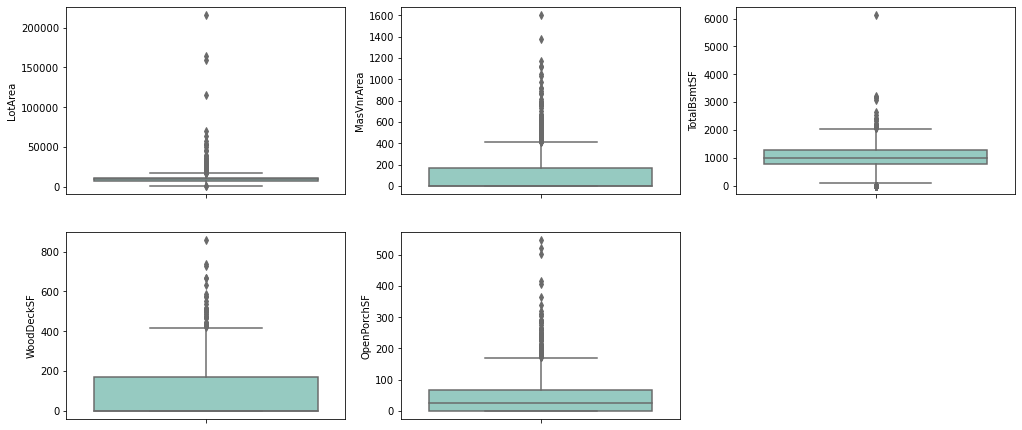

In [27]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house_numeric)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house_numeric)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house_numeric)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_numeric)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_numeric)
plt.show()

In [28]:
# Remove Outliers

# Remove values beyond 98% for LotArea, MasVnrArea, TotalBsmtSF, WoodDeckSF, OpenPorchSF   

v_quartile_LotArea = housingDF['LotArea'].quantile(0.98)
housingDF = housingDF[housingDF["LotArea"] < v_quartile_LotArea]

v_quartile_MasVnrArea = housingDF['MasVnrArea'].quantile(0.98)
housingDF = housingDF[housingDF["MasVnrArea"] < v_quartile_MasVnrArea]

v_quartile_TotalBsmtSF = housingDF['TotalBsmtSF'].quantile(0.99)
housingDF = housingDF[housingDF["TotalBsmtSF"] < v_quartile_TotalBsmtSF]

v_quartile_WoodDeckSF = housingDF['WoodDeckSF'].quantile(0.99)
housingDF = housingDF[housingDF["WoodDeckSF"] < v_quartile_WoodDeckSF]

v_quartile_OpenPorchSF = housingDF['OpenPorchSF'].quantile(0.99)
housingDF = housingDF[housingDF["OpenPorchSF"] < v_quartile_OpenPorchSF]

In [29]:
# Check the percentage of data retained

num_data = round(100*(len(housingDF)/1460),2)
print(num_data)

93.01


# 3. Exploratory data analysis ( Univariate & Bivariate )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

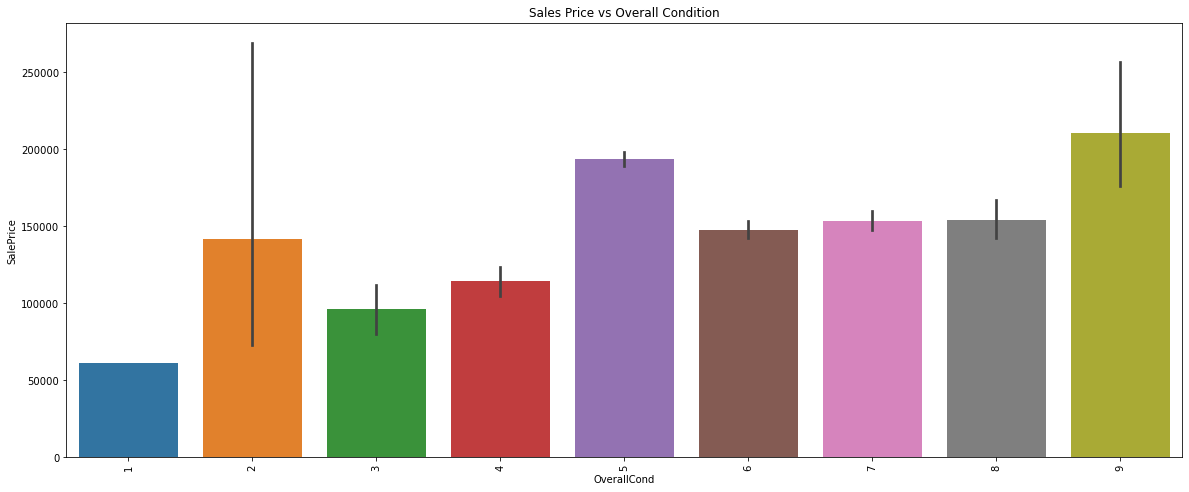

In [30]:
# plot 'overall condition' vs 'Saleprice'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housingDF)
plt.title("Sales Price vs Overall Condition")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'NPkVill'),
  Text(20, 0, 'StoneBr'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

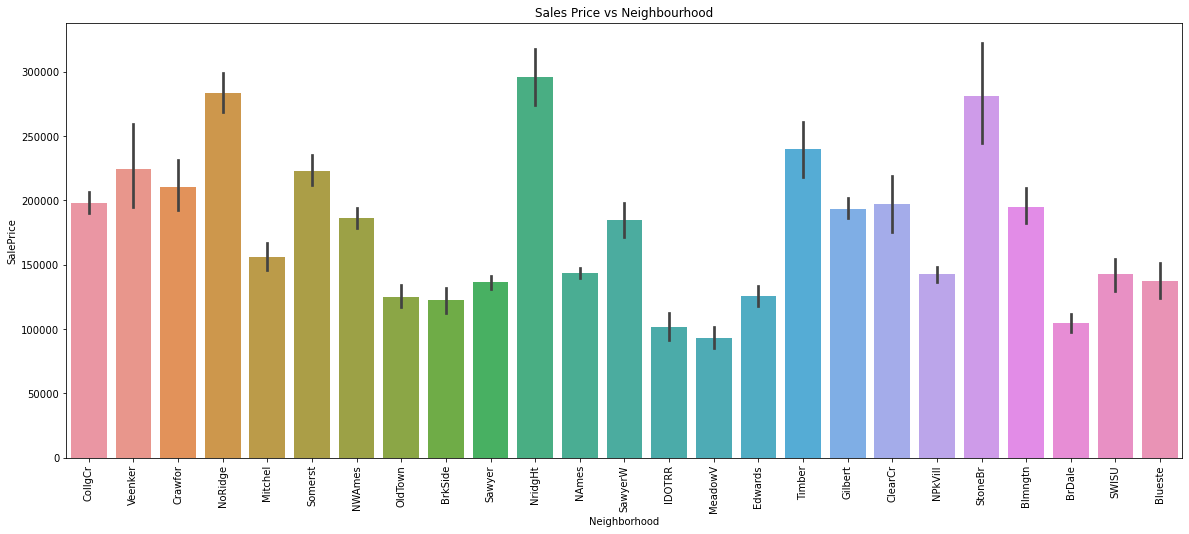

In [31]:
# plot 'Sale Price' vs 'Neighborhood'
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housingDF)
plt.title("Sales Price vs Neighbourhood")
plt.xticks(rotation=90)

###  Sales price are high for the properties related to neighborhood

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

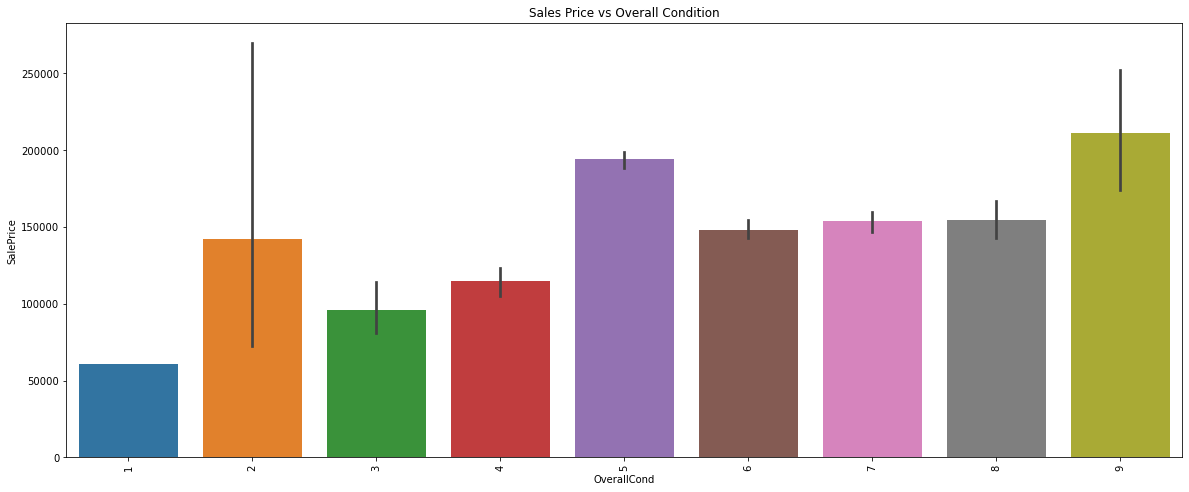

In [32]:
# plot 'overall condition' vs 'Saleprice'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housingDF)
plt.title("Sales Price vs Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

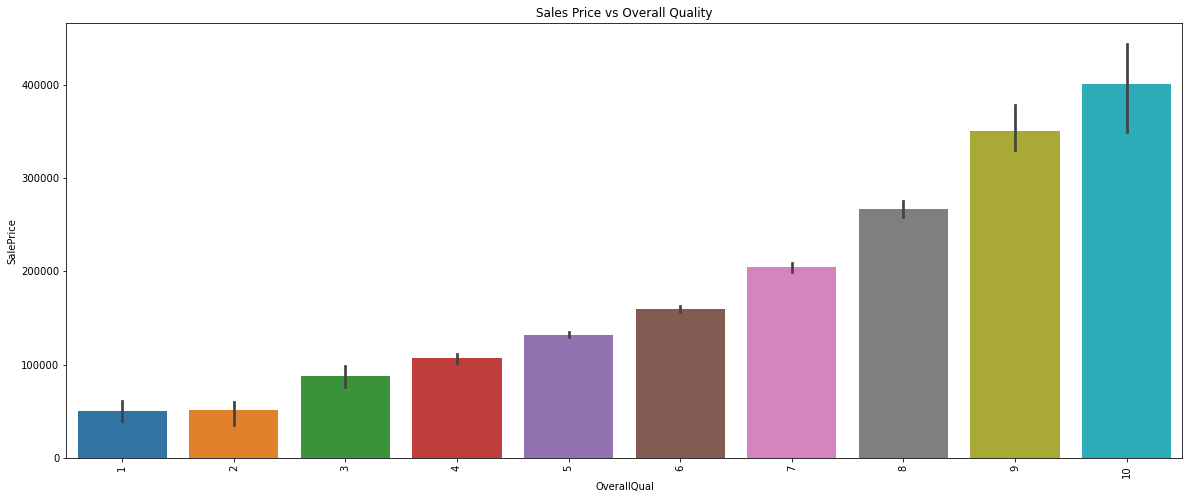

In [33]:
# plot 'overall quality' vs 'Saleprice'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housingDF)
plt.title("Sales Price vs Overall Quality")
plt.xticks(rotation=90)

In [34]:
#### Increase in the overall quality will increase the sale price directly

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

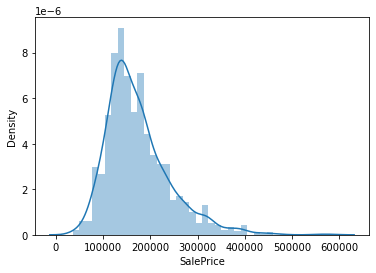

In [35]:
sns.distplot(housingDF['SalePrice'])

### Saleprice figure is skewed towards Left, So we  apply log transformation to get a centralized data

In [36]:
#Log Transformation on SalePrice
housingDF['SalePrice']=np.log1p(housingDF['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

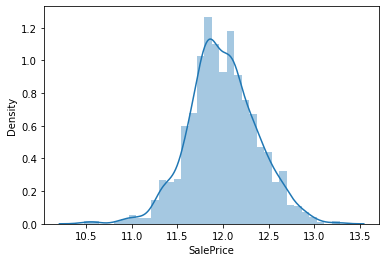

In [37]:
sns.distplot(housingDF['SalePrice'])

##  Checking the Correlation between the variables.

In [38]:
correlationV = housingDF.corr()
correlationV

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,BuiltOrRemodelAge
Id,1.000000,0.011880,-0.021860,-0.007403,-0.022829,0.011214,-0.039100,-0.013113,-0.007546,-0.020687,...,-0.000394,0.016598,0.018035,-0.009454,0.016031,0.012624,-0.040778,-0.037938,-0.015771,0.010050
MSSubClass,0.011880,1.000000,-0.401931,-0.393699,0.060222,-0.059830,0.024548,-0.071873,-0.129118,-0.245604,...,0.187404,-0.032854,0.051450,-0.031299,-0.040892,-0.105249,-0.030496,0.004843,-0.059653,-0.048133
LotFrontage,-0.021860,-0.401931,1.000000,0.570154,0.190775,-0.051785,0.162426,0.107511,0.141324,0.288790,...,0.040485,0.256733,0.305140,0.203051,0.272192,0.304673,0.079295,0.134818,0.340837,-0.065145
LotArea,-0.007403,-0.393699,0.570154,1.000000,0.171768,-0.005919,0.096369,0.142376,0.092427,0.287169,...,0.092749,0.285788,0.370356,0.308544,0.258948,0.296699,0.136089,0.133542,0.380824,-0.039391
OverallQual,-0.022829,0.060222,0.190775,0.171768,1.000000,-0.088590,0.366129,0.193002,0.285256,0.507715,...,0.246581,0.109499,0.386576,0.377691,0.586480,0.539509,0.219328,0.358891,0.813190,-0.548074
OverallCond,0.011214,-0.059830,-0.051785,-0.005919,-0.088590,1.000000,-0.125851,-0.017521,-0.143153,-0.162739,...,-0.050472,0.014373,-0.047843,-0.011391,-0.177895,-0.136103,0.003890,-0.055243,-0.024053,-0.073388
MasVnrArea,-0.039100,0.024548,0.162426,0.096369,0.366129,-0.125851,1.000000,0.213629,0.086560,0.307658,...,0.162853,0.119338,0.241253,0.224874,0.336142,0.338542,0.123847,0.164114,0.380392,-0.142217
BsmtFinSF1,-0.013113,-0.071873,0.107511,0.142376,0.193002,-0.017521,0.213629,1.000000,-0.558481,0.427601,...,-0.031305,-0.118604,-0.038561,0.204278,0.189729,0.230009,0.195079,0.064733,0.352239,-0.121970
BsmtUnfSF,-0.007546,-0.129118,0.141324,0.092427,0.285256,-0.143153,0.086560,-0.558481,1.000000,0.437582,...,-0.062549,0.161291,0.238135,0.039859,0.204051,0.175354,-0.040374,0.137854,0.203529,-0.174480
TotalBsmtSF,-0.020687,-0.245604,0.288790,0.287169,0.507715,-0.162739,0.307658,0.427601,0.437582,1.000000,...,-0.113918,0.050113,0.214726,0.277055,0.421145,0.444024,0.202218,0.224610,0.611669,-0.303012


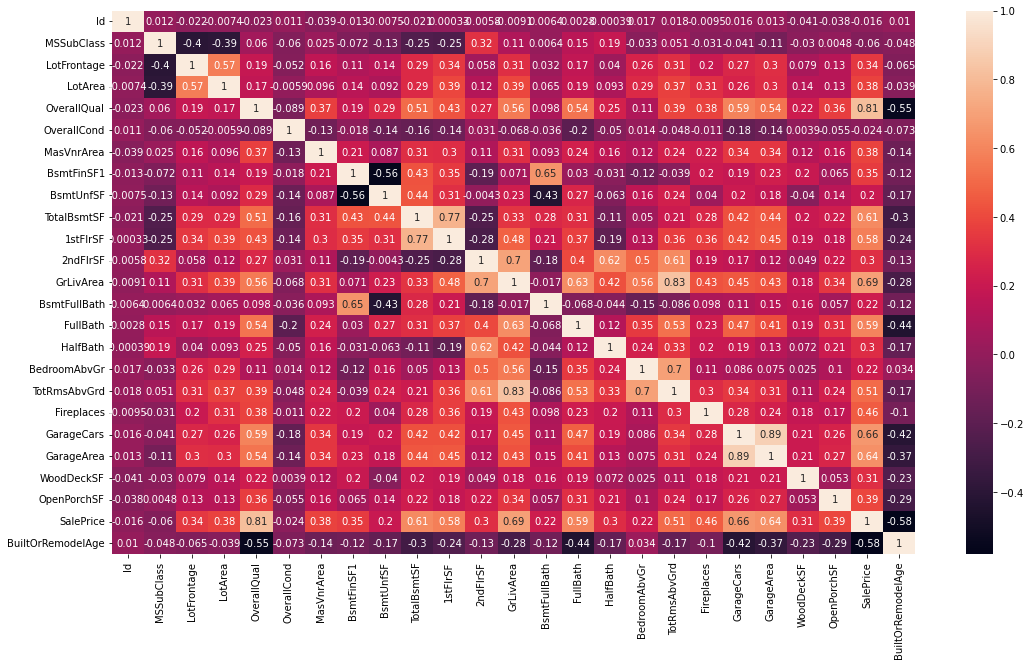

In [39]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(18,10))
# heatmap
sns.heatmap(correlationV, annot=True)
plt.show()

### We can see that some of the variables are correlated
### Check their predictive power and based on that dropping the columns

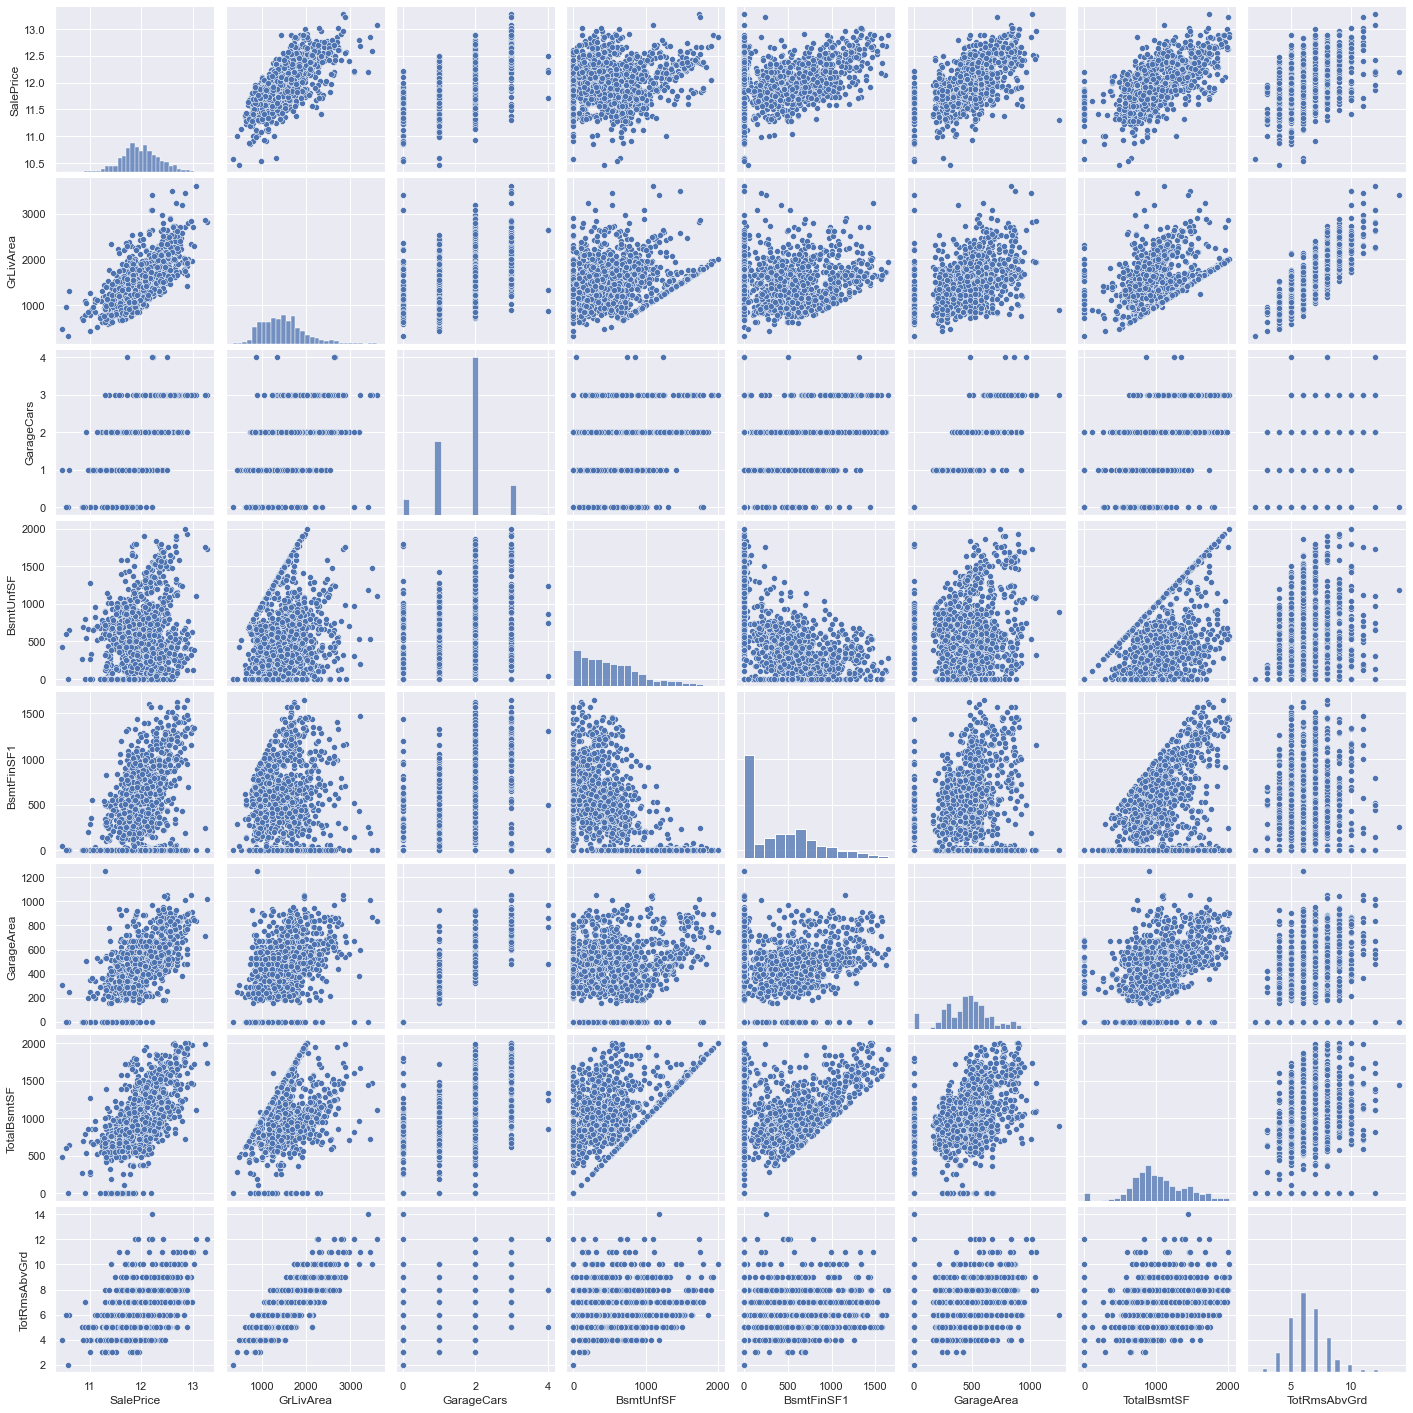

In [40]:
# Checking the relation with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']
sns.pairplot(housingDF[cols], size = 2.5)
plt.show()

In [41]:
### Drop the below columns that are correlated & not contributing to 'SalePrice'

In [42]:
housingDF = housingDF.drop(['GarageCars'], axis = 1)
housingDF = housingDF.drop(['BsmtUnfSF'], axis = 1)
housingDF = housingDF.drop(['TotRmsAbvGrd'], axis = 1)
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,None,Attchd,RFn,548,0,61,None,Normal,12.247699,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,TA,Attchd,RFn,460,298,0,None,Normal,12.109016,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,TA,Attchd,RFn,608,0,42,None,Normal,12.317171,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Gd,Detchd,Unf,642,0,35,None,Abnorml,11.849405,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,TA,Attchd,RFn,836,192,84,None,Normal,12.429220,8


In [43]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1358 non-null   int64  
 1   MSSubClass         1358 non-null   int64  
 2   MSZoning           1358 non-null   object 
 3   LotFrontage        1358 non-null   float64
 4   LotArea            1358 non-null   int64  
 5   LotShape           1358 non-null   object 
 6   LotConfig          1358 non-null   object 
 7   Neighborhood       1358 non-null   object 
 8   BldgType           1358 non-null   object 
 9   HouseStyle         1358 non-null   object 
 10  OverallQual        1358 non-null   int64  
 11  OverallCond        1358 non-null   int64  
 12  RoofStyle          1358 non-null   object 
 13  Exterior1st        1358 non-null   object 
 14  Exterior2nd        1358 non-null   object 
 15  MasVnrType         1358 non-null   object 
 16  MasVnrArea         1358 

#  4. Data Preparation

In [44]:
# Drop 'Id' column from the housing Dataframe
housingDF = housingDF.drop(['Id'], axis=1)
housingDF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,None,Attchd,RFn,548,0,61,None,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,TA,Attchd,RFn,460,298,0,None,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,TA,Attchd,RFn,608,0,42,None,Normal,12.317171,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Gd,Detchd,Unf,642,0,35,None,Abnorml,11.849405,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,TA,Attchd,RFn,836,192,84,None,Normal,12.429220,8


In [45]:
types = housingDF.dtypes
#numerical values are either type int or float
type_numeric = types[(types == 'int64') | (types == float)] 
#categorical values are type object
type_categorical = types[types == object]

In [46]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     22
int64      18
float64     3
Name: 0, dtype: int64

In [47]:
#Convert numeric_type to a list to make it easier to work 
numerical_columns = list(type_numeric.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'BuiltOrRemodelAge']


In [48]:
# Convert Categorical types to a list too
categorical_columns = list(type_categorical.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition']


### Creating Dummy columns -  Convert categorical into numerical

In [49]:
housingDF = pd.get_dummies(housingDF, drop_first=True )
housingDF.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,756,961,756,...,1,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


### Train and Test Split creation

In [50]:
X = housingDF.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,756,961,756,...,1,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# Assigning the target variable (SalePrice) to y
y = housingDF['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [52]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [53]:
from sklearn.preprocessing import StandardScaler

##### 

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'BuiltOrRemodelAge']

In [54]:
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']])

In [55]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1046,0.053081,0.873993,1.844583,2.273154,-0.507964,0.960833,-0.400403,2.605478,2.559945,1.276181,...,0,0,0,0,1,0,0,0,0,1
1255,-0.183110,-0.839772,-0.860130,-0.035645,0.387335,-0.619561,0.051561,-0.337197,-0.479273,0.169009,...,1,0,0,0,1,0,0,0,1,0
339,-0.891684,-0.112720,0.837204,-0.035645,1.282634,0.717695,0.442449,0.541887,0.273912,-0.796217,...,1,0,0,0,1,0,0,0,1,0
304,0.407368,0.977857,2.486594,0.733955,3.073232,-0.619561,-0.986735,1.219127,1.627290,3.504719,...,1,0,0,0,1,0,0,0,1,0
919,-0.891684,0.977857,0.459437,-0.035645,2.177933,-0.619561,0.303195,0.459556,0.859395,-0.796217,...,1,0,0,0,1,0,0,0,1,0


In [56]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
179,-0.612189,-0.515573,-0.303677,-0.712249,0.314962,-0.64125,-1.078165,-0.172638,-0.506597,-0.799689,...,1,0,0,0,1,0,0,0,1,0
1414,-0.137109,-0.312822,0.964212,0.021583,1.201201,-0.64125,-1.078165,-0.528192,-0.256732,1.117408,...,1,0,0,0,1,0,0,0,1,0
870,-0.849729,-0.515573,-0.840704,-0.712249,-0.571276,-0.64125,-1.078165,-0.367534,-0.724127,-0.799689,...,1,0,0,0,1,0,0,0,1,0
569,0.813050,-0.059384,-0.719873,-0.712249,-0.571276,-0.64125,1.214708,-0.238482,-0.580087,-0.799689,...,1,0,0,0,1,0,0,0,1,0
814,-0.137109,-1.275888,-0.379756,-0.712249,1.201201,-0.64125,-1.078165,-0.915350,-1.335562,0.560365,...,1,0,0,0,1,0,0,0,1,0


# 5 Model Building and Evaluation

###  Using Linear Regression and RFE (OPTIONAL) we are going to check.

In [57]:
# Importing RFE and LinearRegression
#  We are going to analyse more variables,so we will be using the automated feature elimination process (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [58]:
# Running RFE 
# There are more than 250 variables for analysis,So we will be running RFE to select some variables that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [59]:
# Check the ranking and support
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 12),
 ('LotFrontage', False, 28),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 20),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 9),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 17),
 ('Fireplaces', False, 51),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 14),
 ('OpenPorchSF', False, 33),
 ('BuiltOrRemodelAge', False, 52),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', False, 10),
 ('LotShape_Reg', False, 3),
 ('LotConfig_CulDSac', False, 2),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', True, 1),
 ('LotConfig_Inside', True, 1),
 ('Neighborhood_Blueste', False, 7),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', True, 1),
 ('Neighborhood_ClearCr', False,

In [60]:
# Select the top 100 variables
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofSty

In [61]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFullBath',
       'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'BuiltOrRemodelAge', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_NPkVill',
       'Neighborhood_Timber', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_WdShing',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Fa', 'BsmtQual_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
X_train_rfe = pd.DataFrame(X_train[col])

In [64]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,...,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_Unf,Fence_GdWo,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
1046,1.844583,2.273154,-0.507964,-0.400403,2.605478,2.559945,1.276181,2.992877,2.670680,1.283969,...,0,0,0,0,0,0,0,0,0,1
1255,-0.860130,-0.035645,0.387335,0.051561,-0.337197,-0.479273,0.169009,-0.204920,-1.003681,-0.732180,...,0,1,0,0,1,0,0,0,1,0
339,0.837204,-0.035645,1.282634,0.442449,0.541887,0.273912,-0.796217,-0.528747,-1.003681,-0.732180,...,0,0,0,0,1,0,0,0,1,0
304,2.486594,0.733955,3.073232,-0.986735,1.219127,1.627290,3.504719,4.324404,2.670680,-0.732180,...,0,0,0,0,1,0,0,0,1,0
919,0.459437,-0.035645,2.177933,0.303195,0.459556,0.859395,-0.796217,-0.104789,-1.003681,-0.732180,...,0,0,0,0,1,0,0,0,1,0


In [65]:
X_train_rfe.shape

(950, 100)

In [66]:
# predict
y_train_predict = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_predict)

0.9279180288442043

In [67]:
y_test_predict = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_predict)

0.8979535264881875

### Using linear Regression and RFE the Test R2 is very low. So will try some alterative method.                

In [68]:
# Check the ranking and support
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 12),
 ('LotFrontage', False, 28),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 20),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 9),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 17),
 ('Fireplaces', False, 51),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 14),
 ('OpenPorchSF', False, 33),
 ('BuiltOrRemodelAge', False, 52),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', False, 10),
 ('LotShape_Reg', False, 3),
 ('LotConfig_CulDSac', False, 2),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', True, 1),
 ('LotConfig_Inside', True, 1),
 ('Neighborhood_Blueste', False, 7),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', True, 1),
 ('Neighborhood_ClearCr', False,

In [69]:
# Select the top 100 variables
column1 = X_test.columns[rfe.support_]
column1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofSty

In [70]:
X_test_rfe = X_test[column1]

In [71]:
X_test_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,...,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_Unf,Fence_GdWo,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
179,-0.303677,-0.712249,0.314962,-1.078165,-0.172638,-0.506597,-0.799689,-1.117624,-1.018974,-0.752870,...,0,1,0,0,1,0,0,0,1,0
1414,0.964212,0.021583,1.201201,-1.078165,-0.528192,-0.256732,1.117408,0.799896,-1.018974,1.203633,...,0,1,0,0,1,0,0,0,1,0
870,-0.840704,-0.712249,-0.571276,-1.078165,-0.367534,-0.724127,-0.799689,-1.278870,-1.018974,-0.752870,...,0,1,0,0,1,0,0,0,1,0
569,-0.719873,-0.712249,-0.571276,1.214708,-0.238482,-0.580087,-0.799689,-1.172099,-1.018974,-0.752870,...,0,1,0,0,1,0,0,0,1,0
814,-0.379756,-0.712249,1.201201,-1.078165,-0.915350,-1.335562,0.560365,-0.503146,-1.018974,1.203633,...,0,1,0,0,1,0,0,0,1,0


# Lasso and Ridge Regression

### Let's now try predicting house prices and perform lasso and ridge regression.

## Lasso Regression

In [72]:
# Checking the dimension of X_train & y_train
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)

X_train  (950, 155)
y_train  (950,)


In [73]:
# Applying Lasso

# list of alphas for tuning 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation with 5 folds
folds = 5
model_crossv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_crossv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# cv_results
cv_results = pd.DataFrame(model_crossv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.120305,0.032227,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.084928,-0.088768,-0.099198,-0.079052,...,-0.088585,0.006673,1,-0.073060,-0.073123,-0.068982,-0.073771,-0.070621,-0.071911,0.001816
1,0.026309,0.006403,0.001304,0.002607,0.001,{'alpha': 0.001},-0.080141,-0.088331,-0.100709,-0.081248,...,-0.088851,0.007737,2,-0.083474,-0.081904,-0.078894,-0.082813,-0.079700,-0.081357,0.001773
2,0.012499,0.006249,0.004430,0.006144,0.01,{'alpha': 0.01},-0.088193,-0.105122,-0.107187,-0.095211,...,-0.100695,0.007721,3,-0.100889,-0.096806,-0.096154,-0.098129,-0.096549,-0.097706,0.001724
3,0.009372,0.007652,0.006251,0.007655,0.05,{'alpha': 0.05},-0.119779,-0.127986,-0.134714,-0.114398,...,-0.123099,0.007288,4,-0.124822,-0.119239,-0.121424,-0.122449,-0.118126,-0.121212,0.002367
4,0.009266,0.000989,0.004447,0.003916,0.1,{'alpha': 0.1},-0.170216,-0.165593,-0.176840,-0.153212,...,-0.162946,0.010449,5,-0.165594,-0.158725,-0.162642,-0.162248,-0.157204,-0.161283,0.002985


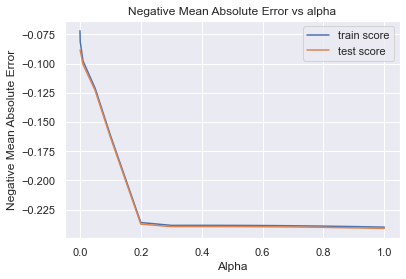

In [75]:
# plotting mean test and train score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Graph Observation:
#### Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter.
#### So we will choose a low value of alpha to balance the trade-off between Bias-Variance¶ & to get the coefficients of smallest of features.

In [76]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated
alphaValue = 0.01
lasso = Lasso(alpha=alphaValue)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00172851,  0.00838591,  0.01859416,  0.12672901,  0.01621157,
        0.        ,  0.03989977,  0.04653046,  0.        ,  0.        ,
        0.08389004,  0.00185412,  0.01433389,  0.01742073,  0.        ,
        0.02383656,  0.04829775,  0.00668661,  0.00336835, -0.00346082,
        0.        ,  0.        ,  0.02506978, -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.  

#### The Lasso technique advantage is clearly visible that it brings the coefficients of insignificant features to zero. 

In [77]:
# lasso -> model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.048),
 ('MSSubClass', -0.002),
 ('LotFrontage', 0.008),
 ('LotArea', 0.019),
 ('OverallQual', 0.127),
 ('OverallCond', 0.016),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.04),
 ('TotalBsmtSF', 0.047),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.084),
 ('BsmtFullBath', 0.002),
 ('FullBath', 0.014),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', 0.0),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.048),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.003),
 ('BuiltOrRemodelAge', -0.003),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.025),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', 0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', -0

In [78]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)
# prediction on the train & test set(Using R2)
y_train_predict = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_predict))
y_test_predict = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_predict))

0.8669313904484864
0.8929220893841415


In [79]:
print('Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

Root Mean Square Error : 0.11691953346644753


####  R2 values for Train and Test matches almost, indicating an good optimum model

In [80]:
# Create dataframe for the coefficients obtained from Lasso
modArray = list(zip(cols, model_parameters))

In [81]:
para = pd.DataFrame(modArray)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.048
1,MSSubClass,-0.002
2,LotFrontage,0.008
3,LotArea,0.019
4,OverallQual,0.127


In [82]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.048
4,OverallQual,0.127
11,GrLivArea,0.084
17,GarageArea,0.048
8,TotalBsmtSF,0.047
...,...,...
64,HouseStyle_2Story,0.000
65,HouseStyle_SFoyer,0.000
155,SaleCondition_Partial,0.000
1,MSSubClass,-0.002


In [83]:
# Choose the variables whose coefficients are non-zero
pred_vars = pd.DataFrame(para[(para['Coeff'] != 0)])
pred_vars

,Variable,Coeff
0,constant,12.048
4,OverallQual,0.127
11,GrLivArea,0.084
17,GarageArea,0.048
8,TotalBsmtSF,0.047
7,BsmtFinSF1,0.040
23,MSZoning_RL,0.025
16,Fireplaces,0.024
3,LotArea,0.019
14,HalfBath,0.017


In [84]:
# These 22 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred_vars.shape

(19, 2)

In [85]:
Lassso_variables= list(pred_vars['Variable'])
print(Lassso_variables)

['constant', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'MSZoning_RL', 'Fireplaces', 'LotArea', 'HalfBath', 'OverallCond', 'FullBath', 'LotFrontage', 'Foundation_PConc', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'MSSubClass', 'BuiltOrRemodelAge']


In [86]:
X_train_lasso = X_train[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'MSZoning_RL', 'Fireplaces', 'LotArea', 'HalfBath', 'OverallCond', 'FullBath', 'LotFrontage', 'Foundation_PConc', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'MSSubClass' ]]
                        
X_train_lasso.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,BsmtFinSF1,MSZoning_RL,Fireplaces,LotArea,HalfBath,OverallCond,FullBath,LotFrontage,Foundation_PConc,WoodDeckSF,OpenPorchSF,BsmtFullBath,MSSubClass
1046,2.273154,2.992877,1.247511,2.605478,-0.400403,1,0.701277,1.844583,1.283969,-0.507964,2.670680,0.873993,1,1.178332,1.155748,-0.786720,0.053081
1255,-0.035645,-0.204920,0.489764,-0.337197,0.051561,0,0.701277,-0.860130,-0.732180,0.387335,-1.003681,-0.839772,0,-0.777234,-0.733126,-0.786720,-0.183110
339,-0.035645,-0.528747,-0.787719,0.541887,0.442449,1,-0.915745,0.837204,-0.732180,1.282634,-1.003681,-0.112720,0,-0.777234,-0.733126,-0.786720,-0.891684
304,0.733955,4.324404,1.995543,1.219127,-0.986735,0,0.701277,2.486594,-0.732180,3.073232,2.670680,0.977857,0,1.982489,-0.733126,-0.786720,0.407368
919,-0.035645,-0.104789,0.688916,0.459556,0.303195,1,0.701277,0.459437,-0.732180,2.177933,-1.003681,0.977857,0,-0.777234,0.158842,1.159593,-0.891684


In [87]:
X_train_lasso.shape

(950, 17)

In [88]:
X_test_lasso = X_test[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'MSZoning_RL', 'Fireplaces', 'LotArea', 'HalfBath', 'OverallCond', 'FullBath', 'LotFrontage', 'Foundation_PConc', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'MSSubClass' ]]
                        
X_test_lasso.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,BsmtFinSF1,MSZoning_RL,Fireplaces,LotArea,HalfBath,OverallCond,FullBath,LotFrontage,Foundation_PConc,WoodDeckSF,OpenPorchSF,BsmtFullBath,MSSubClass
179,-0.712249,-1.117624,0.090765,-0.172638,-1.078165,0,-0.937353,-0.303677,-0.752870,0.314962,-1.018974,-0.515573,0,-0.786613,-0.784409,-0.832820,-0.612189
1414,0.021583,0.799896,-0.455798,-0.528192,-1.078165,1,0.630024,0.964212,1.203633,1.201201,-1.018974,-0.312822,0,-0.786613,-0.784409,-0.832820,-0.137109
870,-0.712249,-1.278870,-0.763861,-0.367534,-1.078165,1,-0.937353,-0.840704,-0.752870,-0.571276,-1.018974,-0.515573,0,-0.786613,-0.784409,-0.832820,-0.849729
569,-0.712249,-1.172099,0.687015,-0.238482,1.214708,1,2.197401,-0.719873,-0.752870,-0.571276,-1.018974,-0.059384,0,-0.395100,-0.784409,1.154259,0.813050
814,-0.712249,-0.503146,-0.902986,-0.915350,-1.078165,1,-0.937353,-0.379756,1.203633,1.201201,-1.018974,-1.275888,0,1.142986,-0.784409,-0.832820,-0.137109


In [89]:
X_test_lasso.shape

(408, 17)

# Ridge Regression

In [90]:
# list of alphas for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation with 5 folds
folds = 5
model_crossv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_crossv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
cv_results = pd.DataFrame(model_crossv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012499,0.006250,0.006253,0.007658,0.0001,{'alpha': 0.0001},-0.088945,-0.094796,-0.105469,-0.082961,...,-0.093334,0.007451,26,-0.071624,-0.071688,-0.066818,-0.072202,-0.069630,-0.070393,0.001991
1,0.009375,0.007655,0.007551,0.007004,0.001,{'alpha': 0.001},-0.088933,-0.094703,-0.105449,-0.082934,...,-0.093302,0.007450,25,-0.071625,-0.071690,-0.066823,-0.072205,-0.069632,-0.070395,0.001990
2,0.003125,0.006250,0.006249,0.007654,0.01,{'alpha': 0.01},-0.088814,-0.093945,-0.105247,-0.082688,...,-0.093027,0.007441,24,-0.071633,-0.071739,-0.066872,-0.072237,-0.069649,-0.070426,0.001985
3,0.011283,0.002448,0.003637,0.004500,0.05,{'alpha': 0.05},-0.088394,-0.092394,-0.104461,-0.081892,...,-0.092278,0.007420,23,-0.071691,-0.071940,-0.067069,-0.072360,-0.069710,-0.070554,0.001966
4,0.009657,0.005747,0.004444,0.003911,0.1,{'alpha': 0.1},-0.087957,-0.091631,-0.103667,-0.081159,...,-0.091691,0.007400,22,-0.071827,-0.072058,-0.067292,-0.072502,-0.069775,-0.070691,0.001941


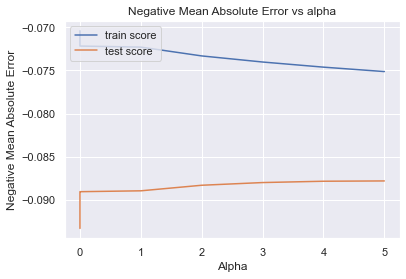

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
#### Since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [94]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.44005474e-02,  8.80405747e-03,  1.54912668e-02,  7.70800539e-02,
        4.21664412e-02, -3.66253153e-03,  2.63524027e-02,  5.68169442e-02,
       -1.40272320e-02, -5.15970987e-04,  1.01747950e-01,  1.17040620e-02,
        2.28153026e-02,  2.44441870e-02,  8.89633258e-03,  4.50626709e-03,
        2.61362962e-02,  1.15509648e-02,  5.55630048e-03, -9.25887875e-04,
        1.35323195e-01,  1.35747033e-01,  1.59202789e-01,  1.28635953e-01,
        4.09619566e-02, -2.67531117e-03,  1.16977913e-02,  3.09015903e-02,
       -4.13334438e-02, -5.93251763e-02, -1.70022889e-02, -1.23250845e-02,
       -3.90155423e-02,  5.20300687e-02,  2.65498343e-03, -5.84467718e-03,
        1.15648223e-01, -5.35317802e-02, -7.22874243e-03, -1.04820162e-01,
       -1.07406509e-01, -4.64200330e-02, -2.65220265e-02,  1.36780056e-02,
       -4.47771522e-02,  3.19341950e-02,  7.22655694e-02, -6.96652337e-02,
       -1.89369023e-02, -3.26764683e-02, -1.42882502e-02,  6.94233386e-02,
        1.03420707e-01,  

In [95]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.84),
 ('MSSubClass', -0.014),
 ('LotFrontage', 0.009),
 ('LotArea', 0.015),
 ('OverallQual', 0.077),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.004),
 ('BsmtFinSF1', 0.026),
 ('TotalBsmtSF', 0.057),
 ('1stFlrSF', -0.014),
 ('2ndFlrSF', -0.001),
 ('GrLivArea', 0.102),
 ('BsmtFullBath', 0.012),
 ('FullBath', 0.023),
 ('HalfBath', 0.024),
 ('BedroomAbvGr', 0.009),
 ('Fireplaces', 0.005),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.006),
 ('BuiltOrRemodelAge', -0.001),
 ('MSZoning_FV', 0.135),
 ('MSZoning_RH', 0.136),
 ('MSZoning_RL', 0.159),
 ('MSZoning_RM', 0.129),
 ('LotShape_IR2', 0.041),
 ('LotShape_IR3', -0.003),
 ('LotShape_Reg', 0.012),
 ('LotConfig_CulDSac', 0.031),
 ('LotConfig_FR2', -0.041),
 ('LotConfig_FR3', -0.059),
 ('LotConfig_Inside', -0.017),
 ('Neighborhood_Blueste', -0.012),
 ('Neighborhood_BrDale', -0.039),
 ('Neighborhood_BrkSide', 0.052),
 ('Neighborhood_ClearCr', 0.003),
 ('Neighborhood_CollgCr', -0.006),
 ('Neighborhood_Craw

In [96]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9242264037955824
0.9086122853474269


In [97]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.10801424593271816


#### It is clearly visible that the ridge model performance is better than Lasso.  The train and the test scores are matching well

In [98]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [99]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.840
23,MSZoning_RL,0.159
22,MSZoning_RH,0.136
21,MSZoning_FV,0.135
24,MSZoning_RM,0.129
37,Neighborhood_Crawfor,0.116
155,SaleCondition_Partial,0.114
53,Neighborhood_StoneBr,0.103
11,GrLivArea,0.102
74,Exterior1st_BrkFace,0.079


In [100]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.840
23,MSZoning_RL,0.159
22,MSZoning_RH,0.136
21,MSZoning_FV,0.135
24,MSZoning_RM,0.129
...,...,...
73,Exterior1st_BrkComm,-0.076
130,KitchenQual_Fa,-0.099
40,Neighborhood_IDOTRR,-0.105
41,Neighborhood_MeadowV,-0.107


In [101]:
## Filter rows whose coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,11.840
23,MSZoning_RL,0.159
22,MSZoning_RH,0.136
21,MSZoning_FV,0.135
24,MSZoning_RM,0.129
...,...,...
73,Exterior1st_BrkComm,-0.076
130,KitchenQual_Fa,-0.099
40,Neighborhood_IDOTRR,-0.105
41,Neighborhood_MeadowV,-0.107


In [102]:
predRFE.shape

(155, 2)

### Residual Analysis of the train data

Text(0.5, 0, 'error')

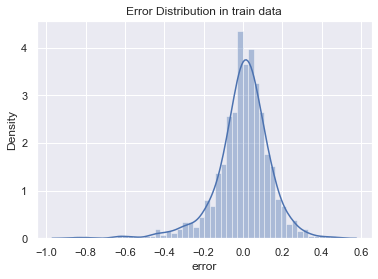

In [103]:
sns.distplot(y_train-y_train_predict)
plt.title('Error Distribution in train data')
plt.xlabel('error')

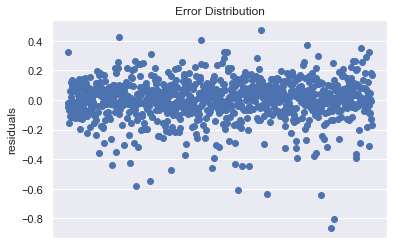

In [104]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_predict)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

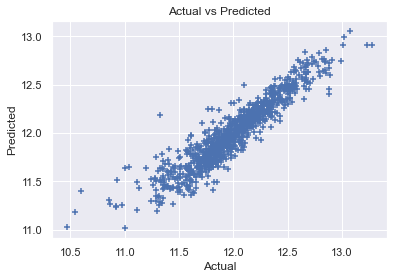

In [105]:
plt.scatter(y_train, y_train_predict, marker='+')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

####  we see linear relationship between actual vs prdicted values of our target variable on train set

## Residual Analysis of the test data

Text(0.5, 0, 'error')

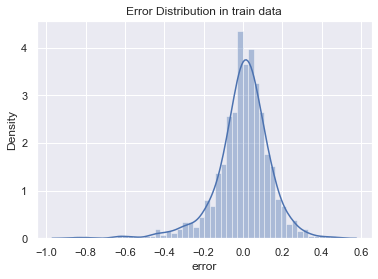

In [106]:
sns.distplot(y_train-y_train_predict)
plt.title('Error Distribution in train data')
plt.xlabel('error')

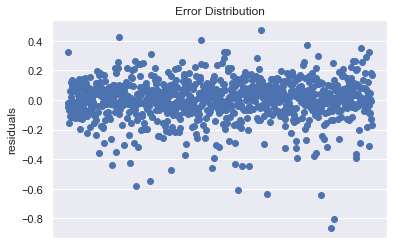

In [107]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_predict)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

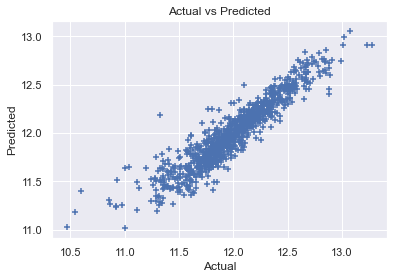

In [108]:
plt.scatter(y_train, y_train_predict, marker='+')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

####  we see linear relationship between actual vs prdicted values of our target variable on train set

## Residual Analysis of the test data

Text(0.5, 0, 'error')

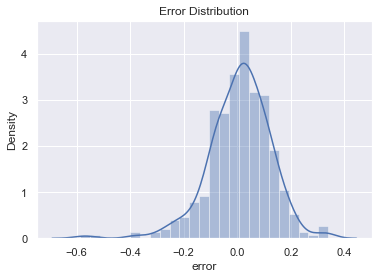

In [109]:
sns.distplot(y_test-y_test_predict)
plt.title('Error Distribution')
plt.xlabel('error')

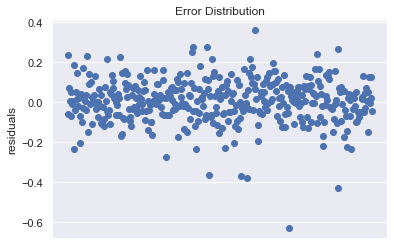

In [110]:
x= [i for i in range (1,y_test.shape[0]+1,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

we notice that there is no heteroscedasticity in residual plot

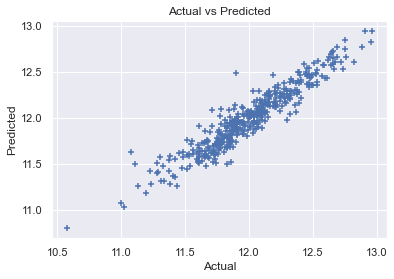

In [111]:
plt.scatter(y_test, y_test_predict, marker='+')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.

Residuals have mean of zero and closely normally distributed.
Residuals do not have any pattern hence it has homoscedasticity.

## Final Observation:

Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test but we use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.

Always uses the simple and robust model for better performance on real world data.


### Using Lasso formulate the Equation for the features and coefficients

In [112]:
### Assign the Features as x1, x2.....
pred_vars.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18']), inplace = True) 
pred_vars

,Variable,Coeff
C,constant,12.048
x1,OverallQual,0.127
x2,GrLivArea,0.084
x3,GarageArea,0.048
x4,TotalBsmtSF,0.047
x5,BsmtFinSF1,0.040
x6,MSZoning_RL,0.025
x7,Fireplaces,0.024
x8,LotArea,0.019
x9,HalfBath,0.017


### Final features that should be selected for predicting the price of house

### Equation

### Log(y) = C + OverallQual(0.127) + xGrLivArea(0.084) + GarageArea(0.048)+ TotalBsmtSF(0.047) + BsmtFinSF1 (0.040) + MSZoning_RL(0.025) + Fireplaces(0.024) + LotArea(0.019) + HalfBath (0.017) + OverallCond (0.016) + FullBath (0.014) +LotFrontage(0.008) + Foundation_PConc(0.007) + WoodDeckSF(0.007) + OpenPorchSF(0.003) + BsmtFullBath(0.002) - MSSubClass (0.002) - BuiltOrRemodelAge (-0.003)

## INFERENCE

####  Higher values of +ive co efficients suggest a increase in sale value.
#### Few features for positive co efficient are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  GarageArea   |Size of garage in square feet  |
        
#### Higher values of -ive co efficients suggest a decrease in sale value.
#### Few features for negative co efficient are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  BuiltOrRemodelAge  |  Age of the property at the time of seeling  |
   |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |
   
   
### Whenever the predicted sale price is lower than the market value, you can plan your purchase of property.